# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Amalina Nur Sabrina
- **Email:** amalina30@students.amikom.ac.id
- **ID Dicoding:** amalina3006

## Menentukan Pertanyaan Bisnis

- Pada bulan berapa perentalan sepeda terbanyak?
- Pada tanggal berapa orang melakukan rental sepeda terlama?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



```
Melakukan import semua library yang dibutuhkan setelah dilakukan instalasi library. Pandas untuk membuat dataframe, numpy untuk melakukan olah data, matplotlib dan seaborn untuk melakukan visualisasi data.
```



## Data Wrangling

### Gathering Data

In [3]:
# Melakukan mount ke Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




```
Kode di atas digunakan untuk melakukan mounting ke Google drive
```



In [4]:
day_df = pd.read_csv("/content/drive/MyDrive/Dicoding/Belajar Analisis dengan Python/Bike Sharing/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600




```
day_df merupakan variabel baru untuk menyimpan data day.csv. 'pd.read_csv' digunakan untuk membaca data csv. serta 'day_df.head()' untuk memanggil 5 data teratas pada data day.csv
```



In [5]:
hour_df = pd.read_csv("/content/drive/MyDrive/Dicoding/Belajar Analisis dengan Python/Bike Sharing/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1




```
hour_df merupakan variabel baru untuk menyimpan data hour.csv. 'pd.read_csv' digunakan untuk membaca data csv. Serta 'hour_df.head()' untuk memanggil 5 data teratas pada data hour.csv
```



### Assessing Data

#### Data Day

In [6]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB




```
Kode di atas untuk memberikan informasi terkait nama kolom, tipe data, jumlah data.
```



In [7]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64



```
isna() digunakan untuk memeriksa data csv apakah terdapat missing value atau tidak. Setelah diperiksa dilakukan penghitungan missing value menggunakan sum()
```



In [8]:
print("Jumlah duplikasi pada data Day: ", day_df.duplicated().sum())

Jumlah duplikasi pada data Day:  0




```
Kode di atas untuk menampilkan keluaran berupa jumlah data duplikasi yang terdapat pada data day.csv.
```



In [9]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000




```
describe() digunakan untuk menampilkan ringkasan statistik dari data day.csv secara ringkas.
```



#### Data Hour

In [10]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB




```
Kode di atas untuk memberikan informasi terkait nama kolom, tipe data, jumlah data.
```



In [11]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64



```
isna() digunakan untuk memeriksa data csv apakah terdapat missing value atau tidak. Setelah diperiksa dilakukan penghitungan missing value menggunakan sum()
```



In [12]:
print("Jumlah duplikasi pada data Hour: ", hour_df.duplicated().sum())

Jumlah duplikasi pada data Hour:  0




```
Kode di atas untuk menampilkan keluaran berupa jumlah data duplikasi yang terdapat pada data day.csv.
```



In [13]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000




```
describe() digunakan untuk menampilkan ringkasan statistik dari data day.csv secara ringkas.
```



### Cleaning Data

In [14]:
# Mengubah tipe data kolom 'dteday' pada data day_df dan hour_df
datetime_column = ["dteday"]

for column in datetime_column:
  day_df[column] = pd.to_datetime(day_df[column])
  hour_df[column] = pd.to_datetime(hour_df[column])



```
Kode di atas digunakan untuk melakukan perubahan tipe data pada kolom 'dteday' baik di data day.csv maupun hour.csv. Tipe data kolom tersebut diubah yang awalnya tipe data object menjadi tipe data datetime.
```



In [15]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa



```
Kode di atas digunakan untuk menampilkan kembali informasi tipe data, nama kolom, dan jumlah data. Untuk kasus disini, digunakan untuk memeriksa apakah tipe data untuk kolom 'dteday' sudah berubah menjadi tipe data datetime atau belum.
```



In [16]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-



```
Kode di atas digunakan untuk menampilkan kembali informasi tipe data, nama kolom, dan jumlah data. Untuk kasus disini, digunakan untuk memeriksa apakah tipe data untuk kolom 'dteday' sudah berubah menjadi tipe data datetime atau belum.
```



## Exploratory Data Analysis (EDA)

### Explore Data day_df

In [17]:
day_df.describe(include = "all")

<ipython-input-17-1360a3627000>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include = "all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000




```
Kode di atas digunakan untuk menampilkan statistik dari keseluruhan data day_df secara lengkap.
```



In [18]:
day_df.groupby(by="season").agg({
    "instant": "nunique",
    "temp": ["max", "min", "mean", "std"]
})

instant      temp                              
       nunique       max       min      mean       std
season                                                
1          181  0.572500  0.059130  0.297748  0.102735
2          184  0.808333  0.253043  0.544405  0.122650
3          188  0.861667  0.469167  0.706309  0.070848
4          178  0.657500  0.220833  0.422906  0.107834



```
Kode di atas digunakan untuk melakukan pengelompokkan data pada day_df berdasarkan kolom 'season'. Untuk setiap kolom 'season' dihitung nilai unik dari kolom 'instant' beserta statistik deskriptif dari kolom 'temp'.
```



In [19]:
day_df.groupby(by="weathersit").instant.nunique().sort_values(ascending=False)

weathersit
1    463
2    247
3     21
Name: instant, dtype: int64



```
Kode di atas digunakan untuk menampilkan informasi terkait nilai yang unik dari kolom 'instant' pada setiap kolom 'weathersit' dan diurutkan dari yang terbesar ke terkecil.
```



In [20]:
day_df.groupby(by="hum").instant.nunique().sort_values(ascending=False)

hum
0.613333    4
0.741250    3
0.630833    3
0.483333    3
0.722917    3
           ..
0.562083    1
0.561765    1
0.561667    1
0.560833    1
0.972500    1
Name: instant, Length: 595, dtype: int64



```
Kode di atas digunakan untuk menampilkan informasi terkait nilai yang unik dari kolom 'instant' pada setiap kolom 'hum' dan diurutkan dari yang terbesar ke terkecil.
```



In [21]:
def max_rental(day_df):
  maks = 0
  bulan = ''

  for index, column in day_df.iterrows():
    if column['cnt'] > maks:
      maks = column['cnt']
      bulan = column['mnth']
  return bulan, maks

bulan, max_rental = max_rental(day_df)
print("Prentalan sepeda terbanyak terjadi pada bulan ke-", bulan, " dengan jumlah ", max_rental, " rental.")

Prentalan sepeda terbanyak terjadi pada bulan ke- 9  dengan jumlah  8714  rental.




```
Kode tersebut digunakan untuk mencari bulan dengan jumlah perentalan sepeda terbanyak pada data day_df yang menggunakan iterasi.
```



### Explore Data hour_df

In [22]:
hour_df.describe(include = "all")

<ipython-input-22-eac10023fa87>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include = "all")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000




```
Kode di atas digunakan untuk menampilkan statistik dari keseluruhan data day_df secara lengkap.
```



In [23]:
baris_terlama = hour_df.nlargest(5, 'hr')

print("Tanggal dengan rental sepeda terlama: ")
print(baris_terlama[['dteday', 'hr']])

Tanggal dengan rental sepeda terlama: 
        dteday  hr
23  2011-01-01  23
46  2011-01-02  23
68  2011-01-03  23
91  2011-01-04  23
114 2011-01-05  23




```
Kode di atas digunakan untuk memanggil lima baris teratas dari perentalan sepeda terlama, yang berdasarkan kolom 'hr'. Lalu ditampilkan dengan menggunakan 'print()'
```



In [30]:
snowfog_weather_rental = hour_df[hour_df['weathersit'] == 4]

total_snowfog_weather_rentals = snowfog_weather_rental['cnt'].sum()

print(f"Jumlah rental sepeda pada weathersit Snow + Fog: {total_snowfog_weather_rentals}.")

Jumlah rental sepeda pada weathersit Snow + Fog: 223.




```
Kode di atas digunakan untuk menghitung jumlah perentalan sepeda yang dilakukan pada saat kolom 'weathersit' menunjukkan angka 4. Setelah dihitung, akan ditampilkan dengan menggunakan 'print()'
```



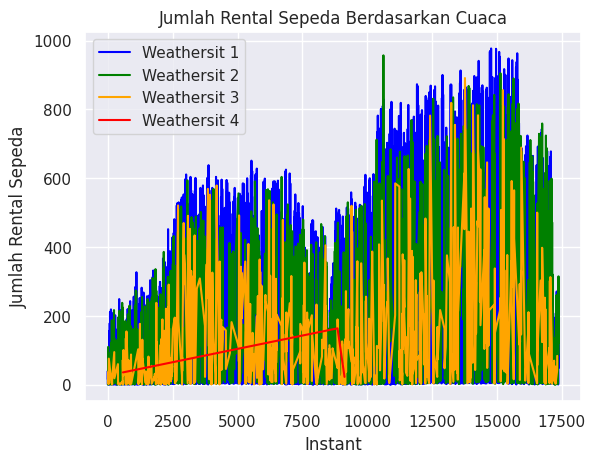

In [34]:
colors = {1: 'blue', 2: 'green', 3: 'orange', 4: 'red'}

for category, color in colors.items():
    weather_rentals = hour_df[hour_df['weathersit'] == category]
    plt.plot(weather_rentals['instant'], weather_rentals['cnt'], color=color, label=f'Weathersit {category}')

plt.xlabel('Instant')
plt.ylabel('Jumlah Rental Sepeda')
plt.title('Jumlah Rental Sepeda Berdasarkan Cuaca')

plt.legend()

plt.show()



```
Kode di atas digunakan untuk menampilkan grafik visualisasi data yang merupakan jumlah perentalan sepeda berdasarkan cuaca. Untuk setiap kategori pada 'weathersit' akan diberikan warna yang berbeda supaya dapat dibedakan.
```



### Teknik Analisis Lanjutan (Klustering)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


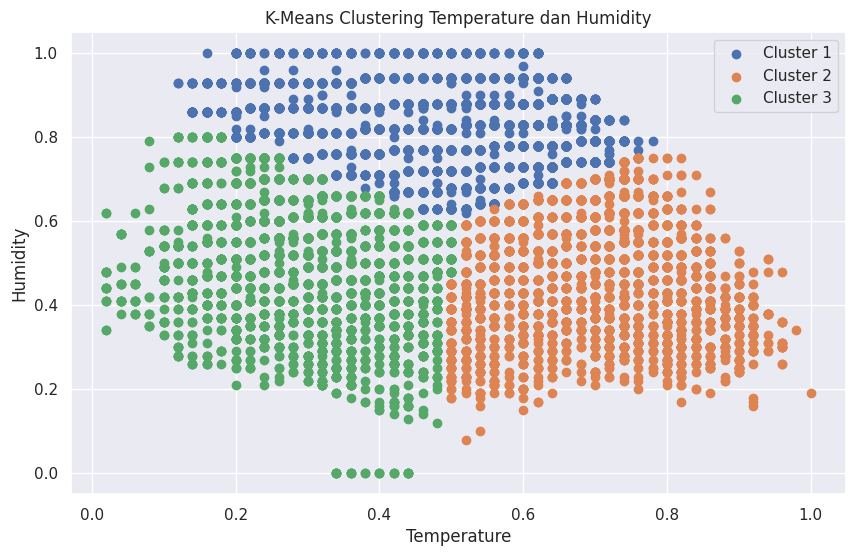

In [42]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

selected_columns = ['temp', 'hum']

data_clustering = hour_df[selected_columns]

scaler = StandardScaler()
data_for_clustering_scaled = scaler.fit_transform(data_clustering)

k = 3

kmeans = KMeans(n_clusters=k, random_state=42)
hour_df['cluster'] = kmeans.fit_predict(data_for_clustering_scaled)

fig, ax = plt.subplots(figsize=(10, 6))

for cluster in range(k):
    cluster_data = hour_df[hour_df['cluster'] == cluster]
    ax.scatter(cluster_data['temp'], cluster_data['hum'], label=f'Cluster {cluster + 1}')

ax.set_xlabel('Temperature')
ax.set_ylabel('Humidity')
ax.set_title('K-Means Clustering Temperature dan Humidity')
ax.legend()
plt.show()



```
Kode di atas digunakan untuk melakukan klustering dengan menggunakan algoritma K-Means berdasarkan kolom 'temp' dan 'hum'. Algoritma K-Means menetapkan tiga kluster yang kemudian divisualisasikan dengan menggunakan scatter plot. Untuk tiap kluster diberikan warna yang berbeda agar mudah dibedakan.
```



## Visualization & Explanatory Analysis

### Pertanyaan 1:

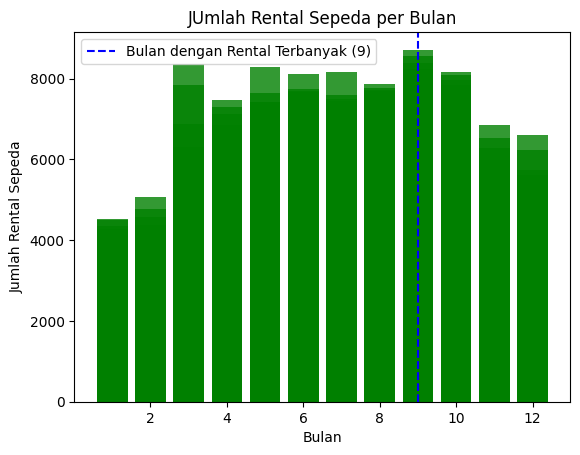

In [25]:
plt.bar(day_df['mnth'], day_df['cnt'], color = 'green', alpha = 0.8)
plt.xlabel('Bulan')
plt.ylabel('Jumlah Rental Sepeda')
plt.title('JUmlah Rental Sepeda per Bulan')
plt.axvline(x=int(bulan), color='blue', linestyle='--', label=f'Bulan dengan Rental Terbanyak ({bulan})')
plt.legend()
plt.show()



```
Kode ini digunakan untuk menampilkan grafik berupa histogram menggunakan library matplotlib. Grafik tersebut menunjukkan jumlah rental sepeda per bulannya. Dan untuk perentalan sepeda terbanyak akan ditandai dengan garis biru putus-putus.
```



### Pertanyaan 2:

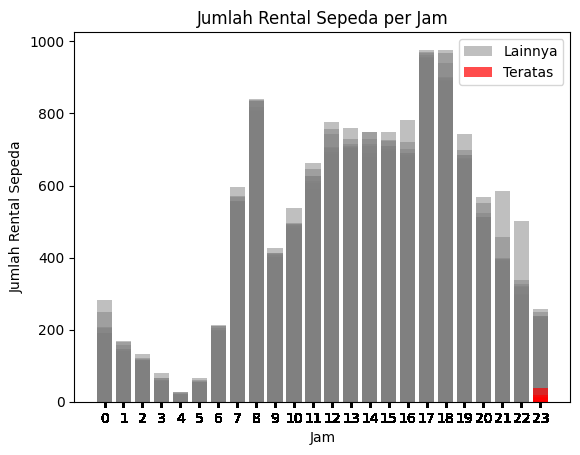

In [26]:
plt.bar(hour_df['hr'], hour_df['cnt'], color='gray', alpha=0.5, label='Lainnya')
plt.bar(baris_terlama['hr'], baris_terlama['cnt'], color='red', alpha=0.7, label='Teratas')
plt.xlabel('Jam')
plt.ylabel('Jumlah Rental Sepeda')
plt.title('Jumlah Rental Sepeda per Jam')
plt.xticks(hour_df['hr'])
plt.legend()
plt.show()



```
Membuat dua histogram pada satu plot. Histogram tersebut merupakan visualisasi data dari jumlah rental sepeda per jam. Dimana untuk yang berwarna merah adalah lima baris teratas dalam data untuk rental sepeda terlama, yaitu 23 jam.
```



<ipython-input-27-07f7c77871e3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='cnt', data=day_df.sort_values(by='cnt', ascending=False), palette=colors_best_season)


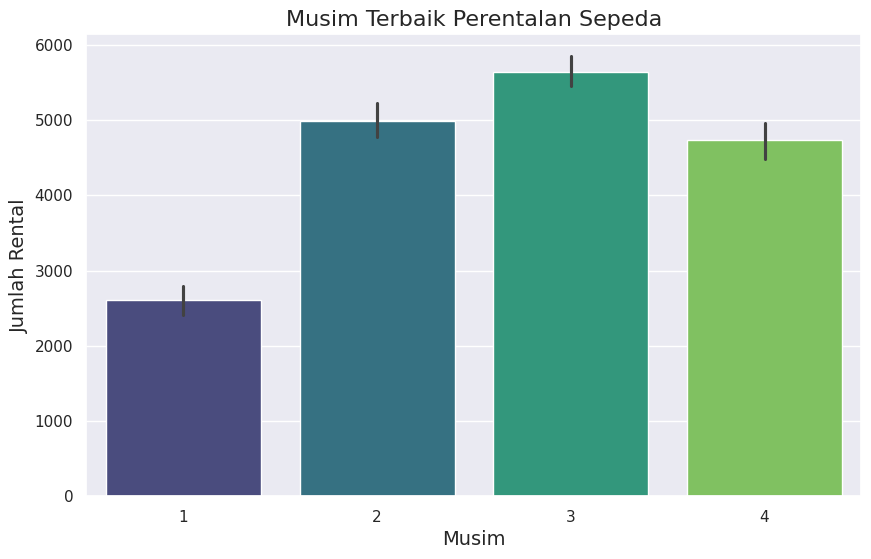

In [27]:
sns.set_theme()

plt.figure(figsize=(10, 6))
colors_best_season = sns.color_palette("viridis", n_colors=day_df['season'].nunique())
sns.barplot(x='season', y='cnt', data=day_df.sort_values(by='cnt', ascending=False), palette=colors_best_season)
plt.xlabel("Musim", fontsize=14)
plt.ylabel("Jumlah Rental", fontsize=14)
plt.title("Musim Terbaik Perentalan Sepeda", fontsize=16)
plt.show()



```
Kode di atas menggunakan library seaborn untuk menampilkan visualisasi data. Berupa visualisasi data untuk menampilkan musim terbaik untuk perentalan sepeda.
```



In [28]:
columns_to_include_day = ['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
                           'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
                           'casual', 'registered', 'cnt']

columns_to_include_hour = ['instant', 'hr']

merged_df = pd.merge(hour_df[columns_to_include_hour], day_df[columns_to_include_day], on='instant')

print(merged_df)

     instant  hr     dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1   0 2011-01-01       1   0     1        0        6           0   
1          2   1 2011-01-02       1   0     1        0        0           0   
2          3   2 2011-01-03       1   0     1        0        1           1   
3          4   3 2011-01-04       1   0     1        0        2           1   
4          5   4 2011-01-05       1   0     1        0        3           1   
..       ...  ..        ...     ...  ..   ...      ...      ...         ...   
726      727  15 2012-12-27       1   1    12        0        4           1   
727      728  16 2012-12-28       1   1    12        0        5           1   
728      729  17 2012-12-29       1   1    12        0        6           0   
729      730  18 2012-12-30       1   1    12        0        0           0   
730      731  19 2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  wind



```
Kode di atas merupakan kode untuk melakukan penggabungan dua data, yaitu data day_df dengan data hour_df yang berdasarkan kolom 'instant'. Kemudian disimpan di merged_df dan ditampilkan.
```



In [29]:
merged_df.to_csv("merged.csv", index = False)



```
Kode di atas digunakan untuk mengubah data yang ada pada merged_df menjadi data dengan format csv.
```



## Conclusion

- Berdasarkan hasil eksplorasi, dapat disimpulkan bahwa perentalan sepeda terbanyak terjadi pada Bulan ke-9 sebanyak 8714 rental.
- Berdasarkan hasil eksplorasi, dapat disimpulkan bahwa rental sepeda terlama adalah 23 jam dan lima tanggal teratas untuk perentalan sepeda terlama adalah tanggal 01-01-2011, 02-01-2011, 03-01-2011, 04-01-2011, 05-01-2011